# __________________CHD Risk Prediction Project _____________________ 

# Purpose:
    
In this project we are going to develop a model that could predict which person are more likely to have a risk of coronory heart disease in next 10 years. We are going to explore the data and then create a model to predict how likely the person get a heart disease.

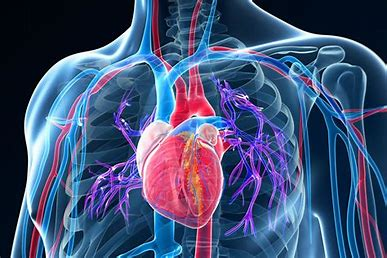

## Summary of the Project:

The dataset contains 3390 observations with 17 features.

The target variable is "TenYearCHD", which is a binary variable indicating whether patient will get coronory heart disease in next ten year or not.

The goal of the project is to develop a model to predict patients who might get CHD and identify key factors contributing to Heart Disease

The project will involve exploratory data analysis, feature selection, and building and evaluating machine learning models.

Potential benefits of the project include improved peoples health condition.

### Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

### To Display Max Row-Columns

In [2]:
pd.set_option('display.max_rows',15000)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',15000)

### Loading Data

In [3]:
df=pd.read_csv('data_cardiovascular_risk.csv')

### Top 5 Rows

In [4]:
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD
0   0   64        2.0   F        YES         3.0     0.0                0             0         0    221.0  148.0   85.0    NaN       90.0     80.0           1
1   1   36        4.0   M         NO         0.0     0.0                0             1         0    212.0  168.0   98.0  29.77       72.0     75.0           0
2   2   46        1.0   F        YES        10.0     0.0                0             0         0    250.0  116.0   71.0  20.35       88.0     94.0           0
3   3   50        1.0   M        YES        20.0     0.0                0             1         0    233.0  158.0   88.0  28.26       68.0     94.0           1
4   4   64        1.0   F        YES        30.0     0.0                0             0         0    241.0  136.5   85.0  26.42       70.0     77.0           0

### Shape of the Data

In [5]:
df.shape

(3390, 17)

- From above we can have overlook on our dataset. We can see that 3,390 observations with 17 features are present.

### Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

### Target variable

No. of people have more risk of CHD= 511
No. of people have less risk of CHD= 2879


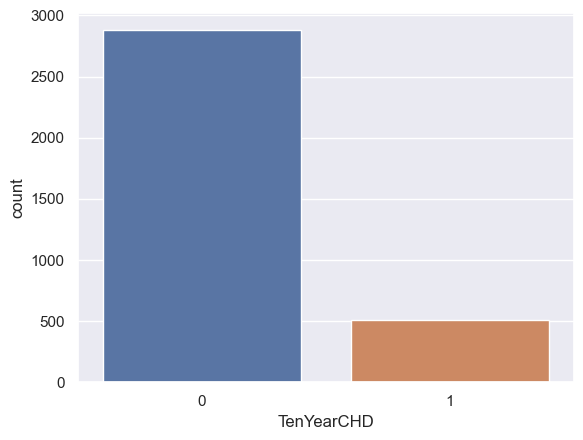

In [7]:
sns.countplot(data=df,x='TenYearCHD')
A ,B=df['TenYearCHD'].value_counts()
print('No. of people have more risk of CHD=',B)
print('No. of people have less risk of CHD=',A)
plt.show()

### Statistical Summary

In [8]:
df.describe()

id          age    education   cigsPerDay       BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol       sysBP        diaBP          BMI    heartRate      glucose   TenYearCHD
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000
mean   1694.500000    49.542183     1.970936     9.069477     0.029886         0.006490      0.315339     0.025664   237.074284   132.60118    82.883038    25.794964    75.977279    82.086520     0.150737
std     978.753033     8.592878     1.019081    11.879078     0.170299         0.080309      0.464719     0.158153    45.247430    22.29203    12.023581     4.115449    11.971868    24.244753     0.357846
min       0.000000    32.000000     1.000000     0.000000     0.000000         0.000000      0.000000     0.000000   107.000000    83.50000    48.000000    15.960000    45.000000    40.000000     0.000000
25%     847.250000    42.000000     1.000000     0.000000     0.000000         0.000000      0.000000     0.000000   206.000000   117.00000    74.500000    23.020000    68.000000    71.000000     0.000000
50%    1694.500000    49.000000     2.000000     0.000000     0.000000         0.000000      0.000000     0.000000   234.000000   128.50000    82.000000    25.380000    75.000000    78.000000     0.000000
75%    2541.750000    56.000000     3.000000    20.000000     0.000000         0.000000      1.000000     0.000000   264.000000   144.00000    90.000000    28.040000    83.000000    87.000000     0.000000
max    3389.000000    70.000000     4.000000    70.000000     1.000000         1.000000      1.000000     1.000000   696.000000   295.00000   142.500000    56.800000   143.000000   394.000000     1.000000

From above we can find out


*   Min. age is 32 and max. age is 70 years.

*   Most of the peoples are non-smokers.
*   Min cholestrol level in patients are 107 and maximum is 696.
*   min max sytolic and diastolic blood pressure are 295mmHg and 142mmHg.
*   Similarly we can check for all the **minimum, maximum, mean, standard deviation, 25% , 50%, 75% values** of the all numerical columns.
*   It will help us to understand our data better.


### Using y_data-profiling to get more insights of datasets

In [9]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [10]:
from ydata_profiling import ProfileReport
profile= ProfileReport(df,title='CHD_report')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Cleaning

### Unique Counts in Datasets

In [11]:
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

### Checking for duplicates

In [12]:
df.duplicated().sum()

0

- No duplcates value in datasets

### Checking for Null Values

In [13]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [14]:
df.isnull().sum()/len(df)*100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

## Null Vallues Imputations

Missing and Duplicate Records can cause problem and bias in our machine learning model. We will check for the any missing values and duplicate records present in our dataset.If present we can drop or impute according to requirements.

In [15]:
df[df.isnull().any(axis=1)]

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD
0        0   64        2.0   F        YES         3.0     0.0                0             0         0    221.0  148.0   85.0    NaN       90.0     80.0           1
8        8   41        2.0   F        YES        20.0     NaN                0             0         0    220.0  126.0   78.0  20.70       86.0     79.0           0
9        9   55        2.0   F         NO         0.0     0.0                0             1         0    326.0  144.0   81.0  25.71       85.0      NaN           0
10      10   61        1.0   F         NO         0.0     0.0                0             1         0      NaN  185.0  121.0  35.22       80.0      NaN           0
36      36   46        3.0   F         NO         0.0     0.0                0             0         0    193.0  106.5   70.5  26.18       75.0      NaN           0
38      38   41        2.0   F        YES         9.0     1.0                1             1         0    180.0  114.0   70.0  22.41       92.0      NaN           0
49      49   46        NaN   F        YES        20.0     0.0                0             0         0    212.0  122.5   75.5  23.51       67.0    103.0           0
54      54   63        1.0   M        YES        20.0     0.0                1             1         0    213.0  163.0   94.0    NaN       76.0     69.0           1
55      55   51        2.0   F         NO         0.0     0.0                0             1         0    351.0  134.0   97.5  21.66      100.0      NaN           0
62      62   52        NaN   F         NO         0.0     0.0                0             0         0    268.0  109.0   70.0  23.74       75.0     78.0           0
69      69   65        NaN   M         NO         0.0     0.0                0             0         0      NaN  152.5   97.5  28.35       65.0     73.0           0
81      81   41        4.0   M        YES        40.0     0.0                0             0         0    254.0  141.0  100.0  27.68      110.0      NaN           1
95      95   40        3.0   F         NO         0.0     0.0                0             0         0    240.0  108.0   72.0  17.64       78.0      NaN           0
102    102   68        2.0   F         NO         0.0     NaN                0             0         0    257.0  144.0   95.0  29.25       80.0     77.0           0
104    104   57        NaN   F         NO         0.0     1.0                0             1         0    190.0  155.0   85.0  26.08       55.0     66.0           0
120    120   65        NaN   F         NO         0.0     0.0                0             0         0    221.0  155.0   92.0  31.34       58.0      NaN           0
128    128   67        2.0   F         NO         0.0     NaN                0             0         0    261.0  117.0   63.0  22.55       75.0     83.0           0
133    133   61        NaN   M        YES         5.0     0.0                0             0         0    175.0  134.0   82.5  18.59       72.0     75.0           1
136    136   38        3.0   F         NO         0.0     0.0                0             0         0    174.0  101.0   68.0  27.47       85.0      NaN           0
138    138   53        3.0   F         NO         0.0     0.0                0             1         0    238.0  172.5   91.0  24.16      112.0      NaN           0
170    170   41        3.0   F         NO         0.0     0.0                0             0         0    180.0  124.0   75.5  24.20       68.0      NaN           0
174    174   60        1.0   F         NO         0.0     NaN                0             1         0    273.0  176.0   84.0  22.17       66.0     79.0           0
186    186   43        4.0   M         NO         0.0     0.0                0             0         0    179.0  125.0   80.0  23.05       63.0      NaN           0
187    187   51        NaN   M         NO       

In [16]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'], dtype='object')

In [17]:
df['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [18]:
def fill_edu(row):
    age= row['age']
    education=row['education']
    if 18<= age <=21:
        if pd.isnull(education):
            return 1
    if 22<= age <=29:
        if pd.isnull(education):
            return 2
    if 30<= age <=45:
        if pd.isnull(education):
            return 3
    if 46<=age <=70:
        if pd.isnull(education):
            return 4
        
    return education

In [19]:
df['education']=df.apply(fill_edu,axis=1)

In [20]:
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [21]:
df.isnull().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

### Outliers in Datasets

In [22]:
outlier = df[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

<Axes: >

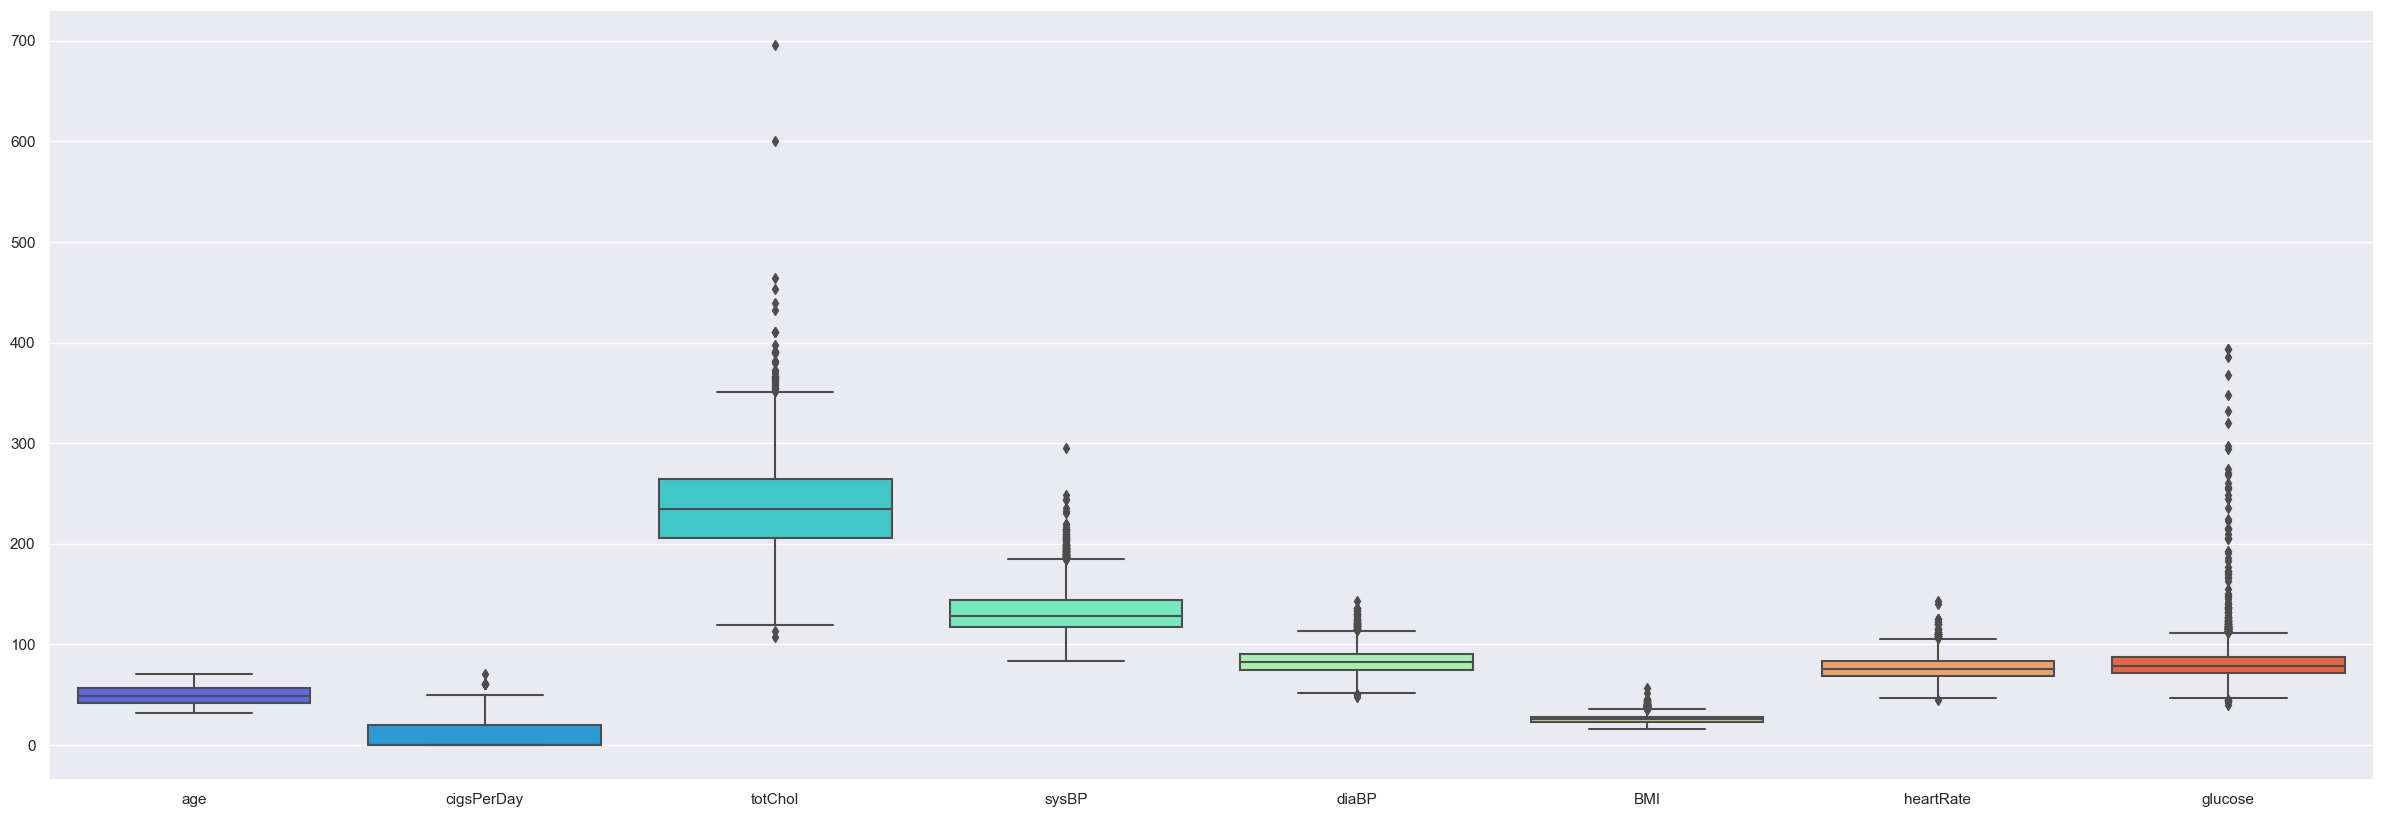

In [23]:
plt.figure(figsize=(30,10))#sets the figure size
sns.boxplot(data=outlier, palette='rainbow')

From above boxplot we can find out:

We can see the five point summary of the each attributes i.e. minimum, first quartile [Q1], median, third quartile [Q3] and maximum.

* We can see, there are outliers present **'totChol', 'sysBP', 'diaBP', 'BMI','hearRate','glucose'** columns.
* In 'cigPerDay' ,'totChol' and 'glucose',we can see that ouliers are sensitive.
* The glucose & cholestrol have the highest no. of outliers. 
* we will fill the null values with median in these columns & outliers with IQR method.
* The remaining columns outliers will not affect our analysis as it is very less.
* In diaBP , sysBP and heartRate the ranges are above normal, It can be the reason for increase in risk of CHD.
* We can keep this outliers as it is important in our analysis and prediction.

In [24]:
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['totChol']=df['totChol'].fillna(df['totChol'].median())
df['BMI']=df['BMI'].fillna(df['BMI'].median())
df['heartRate']=df['heartRate'].fillna(df['heartRate'].median())
df['glucose']=df['glucose'].fillna(df['glucose'].median())

In [25]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Outliers Treatment by IQR Method

In [26]:
Q1 = df['glucose'].quantile(0.25)
Q3 = df['glucose'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

print("Q1: {} | Q3: {} | IQR: {} | LL: {} | UL: {}".format(Q1,Q3,IQR,LL,UL))

Q1: 72.0 | Q3: 85.0 | IQR: 13.0 | LL: 52.5 | UL: 104.5


In [27]:
ul_outlier_count = df[df['glucose'] > UL].shape[0]
ll_outlier_count = df[df['glucose'] < LL].shape[0]

total_outlier_count = ll_outlier_count + ul_outlier_count

total_outlier_perc = total_outlier_count * 100 / df.shape[0]

print("UL_OC: {} | LL_OC: {} | T_OC: {} | T_OP: {}".format(ul_outlier_count,ll_outlier_count,total_outlier_count,total_outlier_perc))

UL_OC: 200 | LL_OC: 14 | T_OC: 214 | T_OP: 6.312684365781711


In [28]:
df['glucose'] = np.where(df['glucose'] >UL, UL,df['glucose'])
df['glucose'] = np.where(df['glucose'] < LL, LL,df['glucose'])

In [29]:
Q1 = df['totChol'].quantile(0.25)
Q3 = df['totChol'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

print("Q1: {} | Q3: {} | IQR: {} | LL: {} | UL: {}".format(Q1,Q3,IQR,LL,UL))

Q1: 206.0 | Q3: 264.0 | IQR: 58.0 | LL: 119.0 | UL: 351.0


In [30]:
ul_outlier_count = df[df['totChol'] > UL].shape[0]
ll_outlier_count = df[df['totChol'] < LL].shape[0]

total_outlier_count = ll_outlier_count + ul_outlier_count

total_outlier_perc = total_outlier_count * 100 / df.shape[0]

print("UL_OC: {} | LL_OC: {} | T_OC: {} | T_OP: {}".format(ul_outlier_count,ll_outlier_count,total_outlier_count,total_outlier_perc))

UL_OC: 41 | LL_OC: 2 | T_OC: 43 | T_OP: 1.2684365781710913


In [31]:
df['totChol'] = np.where(df['totChol'] >UL, UL,df['totChol'])
df['totChol'] = np.where(df['totChol'] < LL, LL,df['totChol'])

In [32]:
Q1 = df['cigsPerDay'].quantile(0.25)
Q3 = df['cigsPerDay'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

print("Q1: {} | Q3: {} | IQR: {} | LL: {} | UL: {}".format(Q1,Q3,IQR,LL,UL))

Q1: 0.0 | Q3: 20.0 | IQR: 20.0 | LL: -30.0 | UL: 50.0


In [33]:
ul_outlier_count = df[df['cigsPerDay'] > UL].shape[0]
ll_outlier_count = df[df['cigsPerDay'] < LL].shape[0]

total_outlier_count = ll_outlier_count + ul_outlier_count

total_outlier_perc = total_outlier_count * 100 / df.shape[0]

print("UL_OC: {} | LL_OC: {} | T_OC: {} | T_OP: {}".format(ul_outlier_count,ll_outlier_count,total_outlier_count,total_outlier_perc))

UL_OC: 9 | LL_OC: 0 | T_OC: 9 | T_OP: 0.26548672566371684


In [34]:
df['cigsPerDay'] = np.where(df['cigsPerDay'] >UL, UL,df['cigsPerDay'])
df['cigsPerDay'] = np.where(df['cigsPerDay'] < LL, LL,df['cigsPerDay'])

## EDA- Exploratory Data Analysis

### Exploration of variables using Histogram

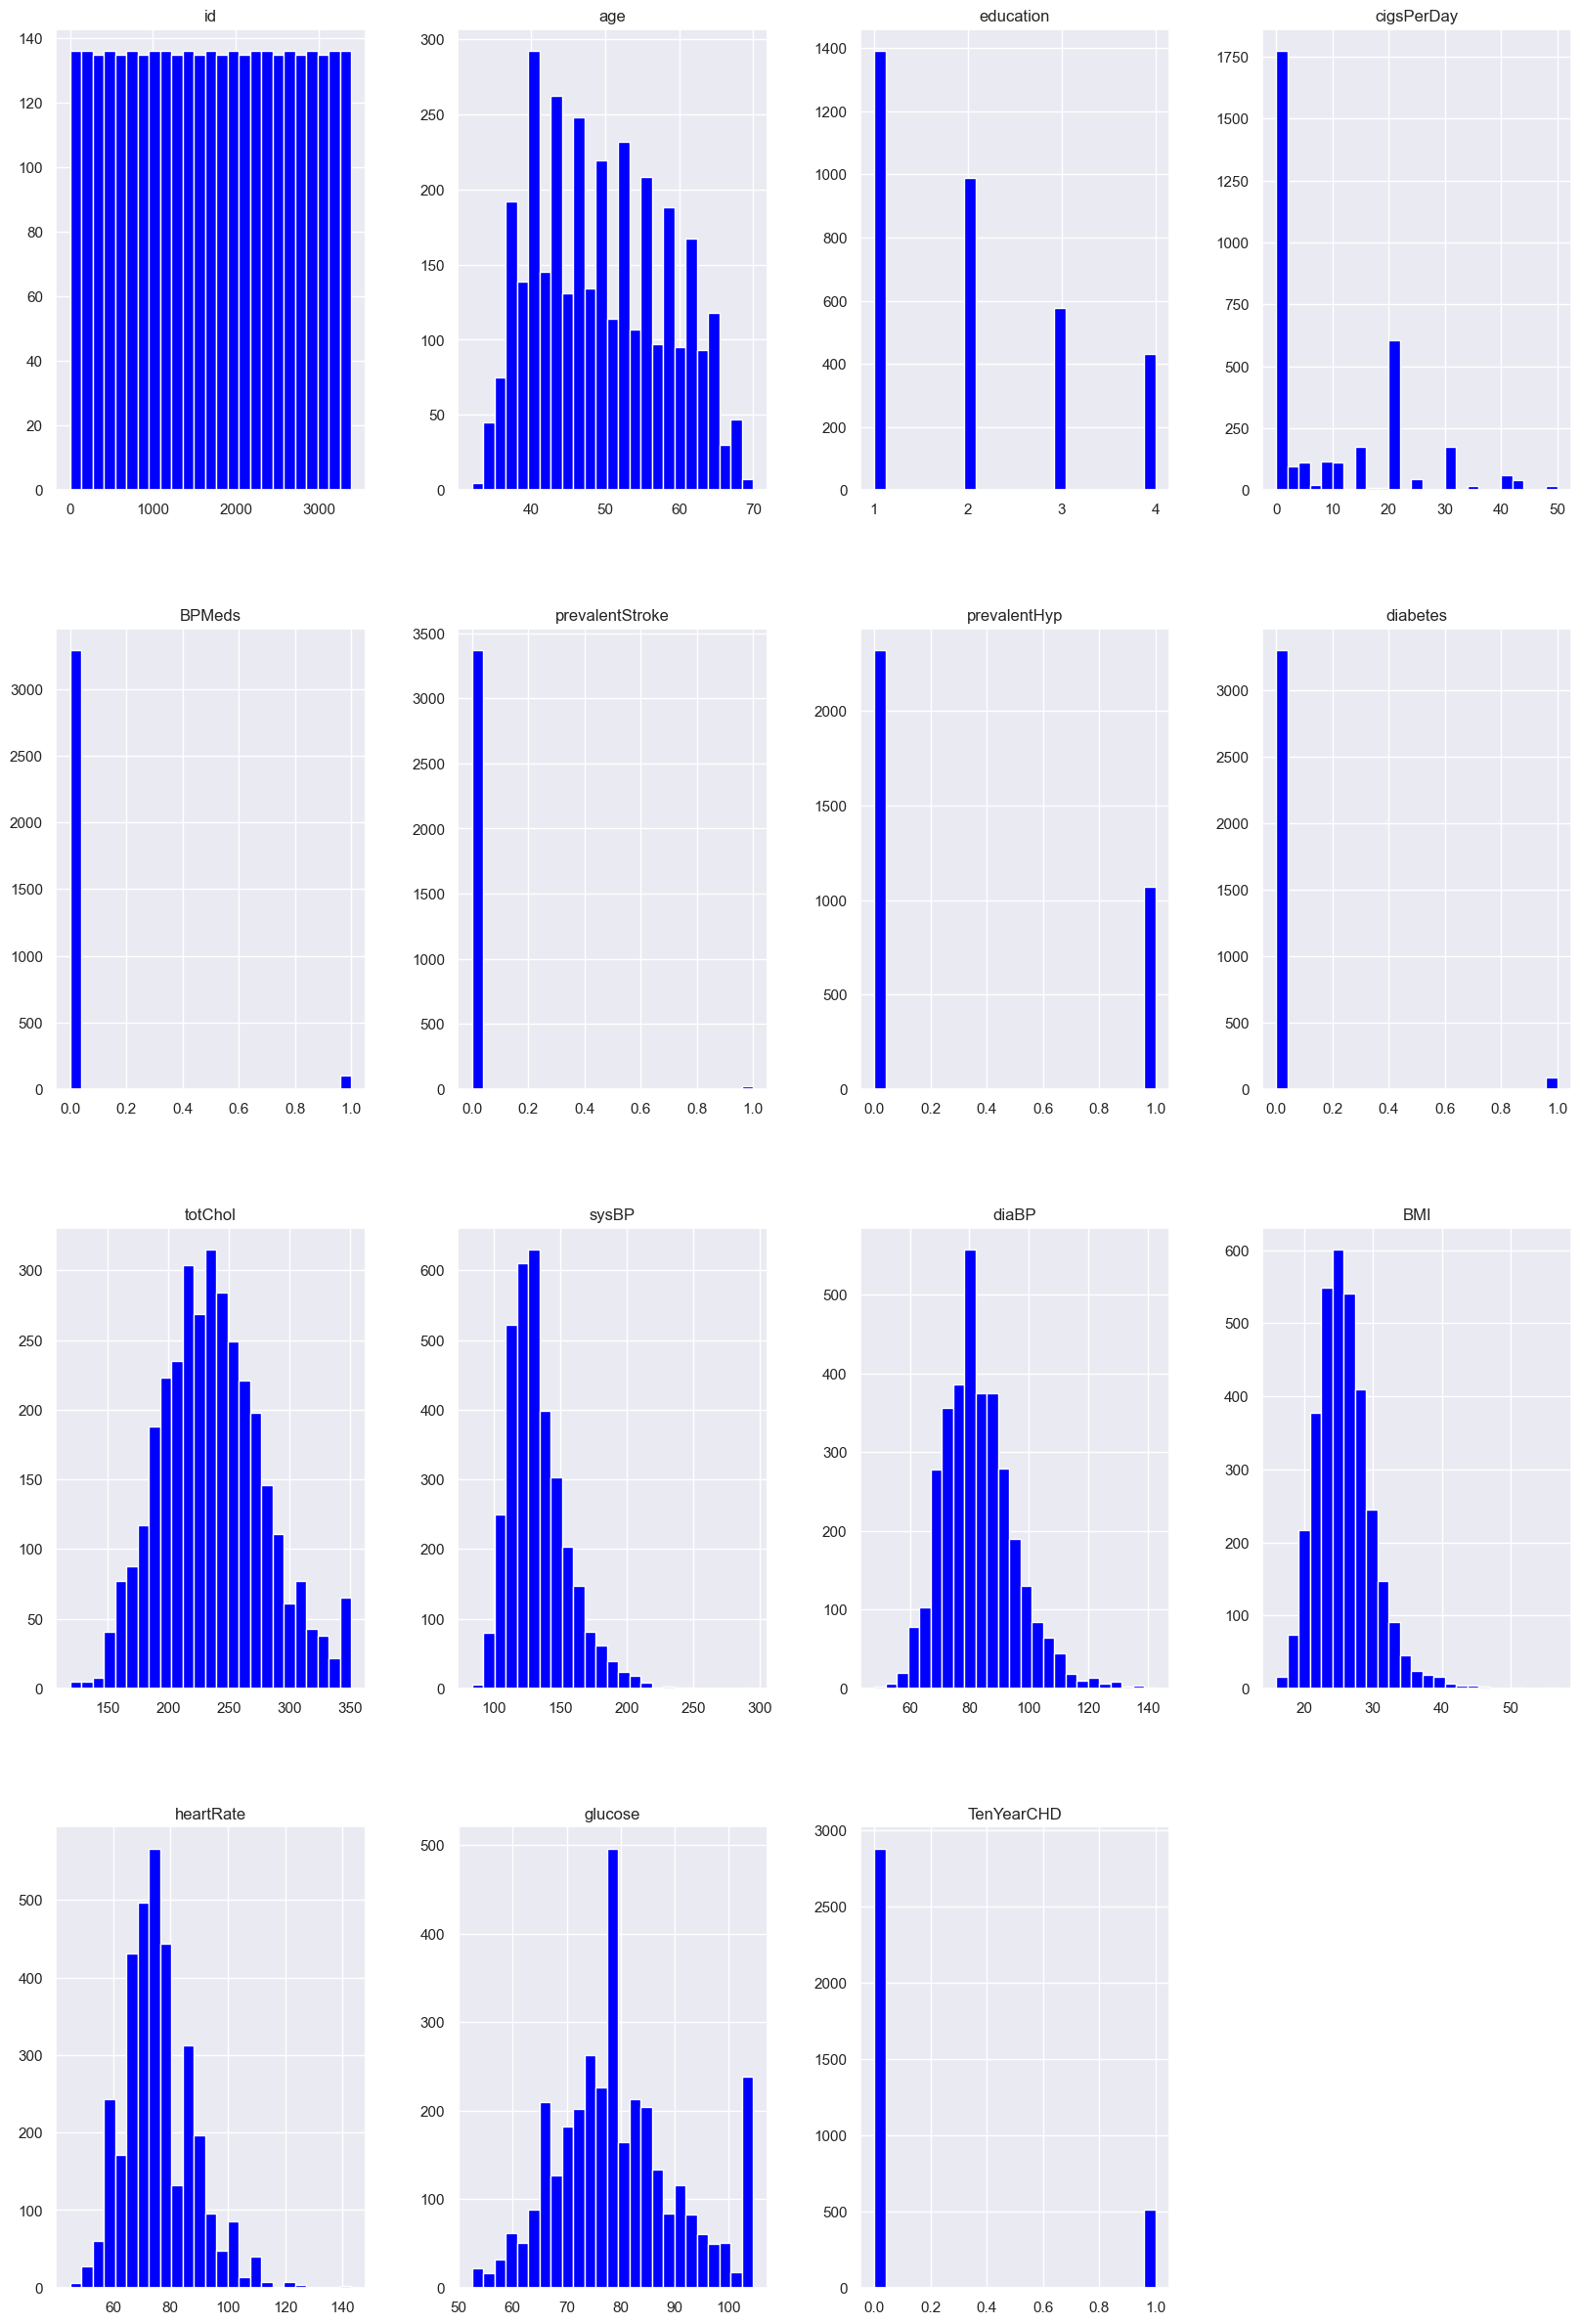

In [35]:
df.hist(bins=25,figsize=(20,30),color='blue')
plt.show()

A few observations can be made based on above plots for numerical features:

* Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. hearRate, glucose,sysBp,diaBP, BMI).

* Age distribution is a slightly right-skewed normal distribution with the bulk of the patients between 40 and 60 years old.

* Also we can observe that most of the patients are non-smokers, but those who are smoking are highly addicted as cigrate per day counts are above 20.

### Exploration of categorical variables

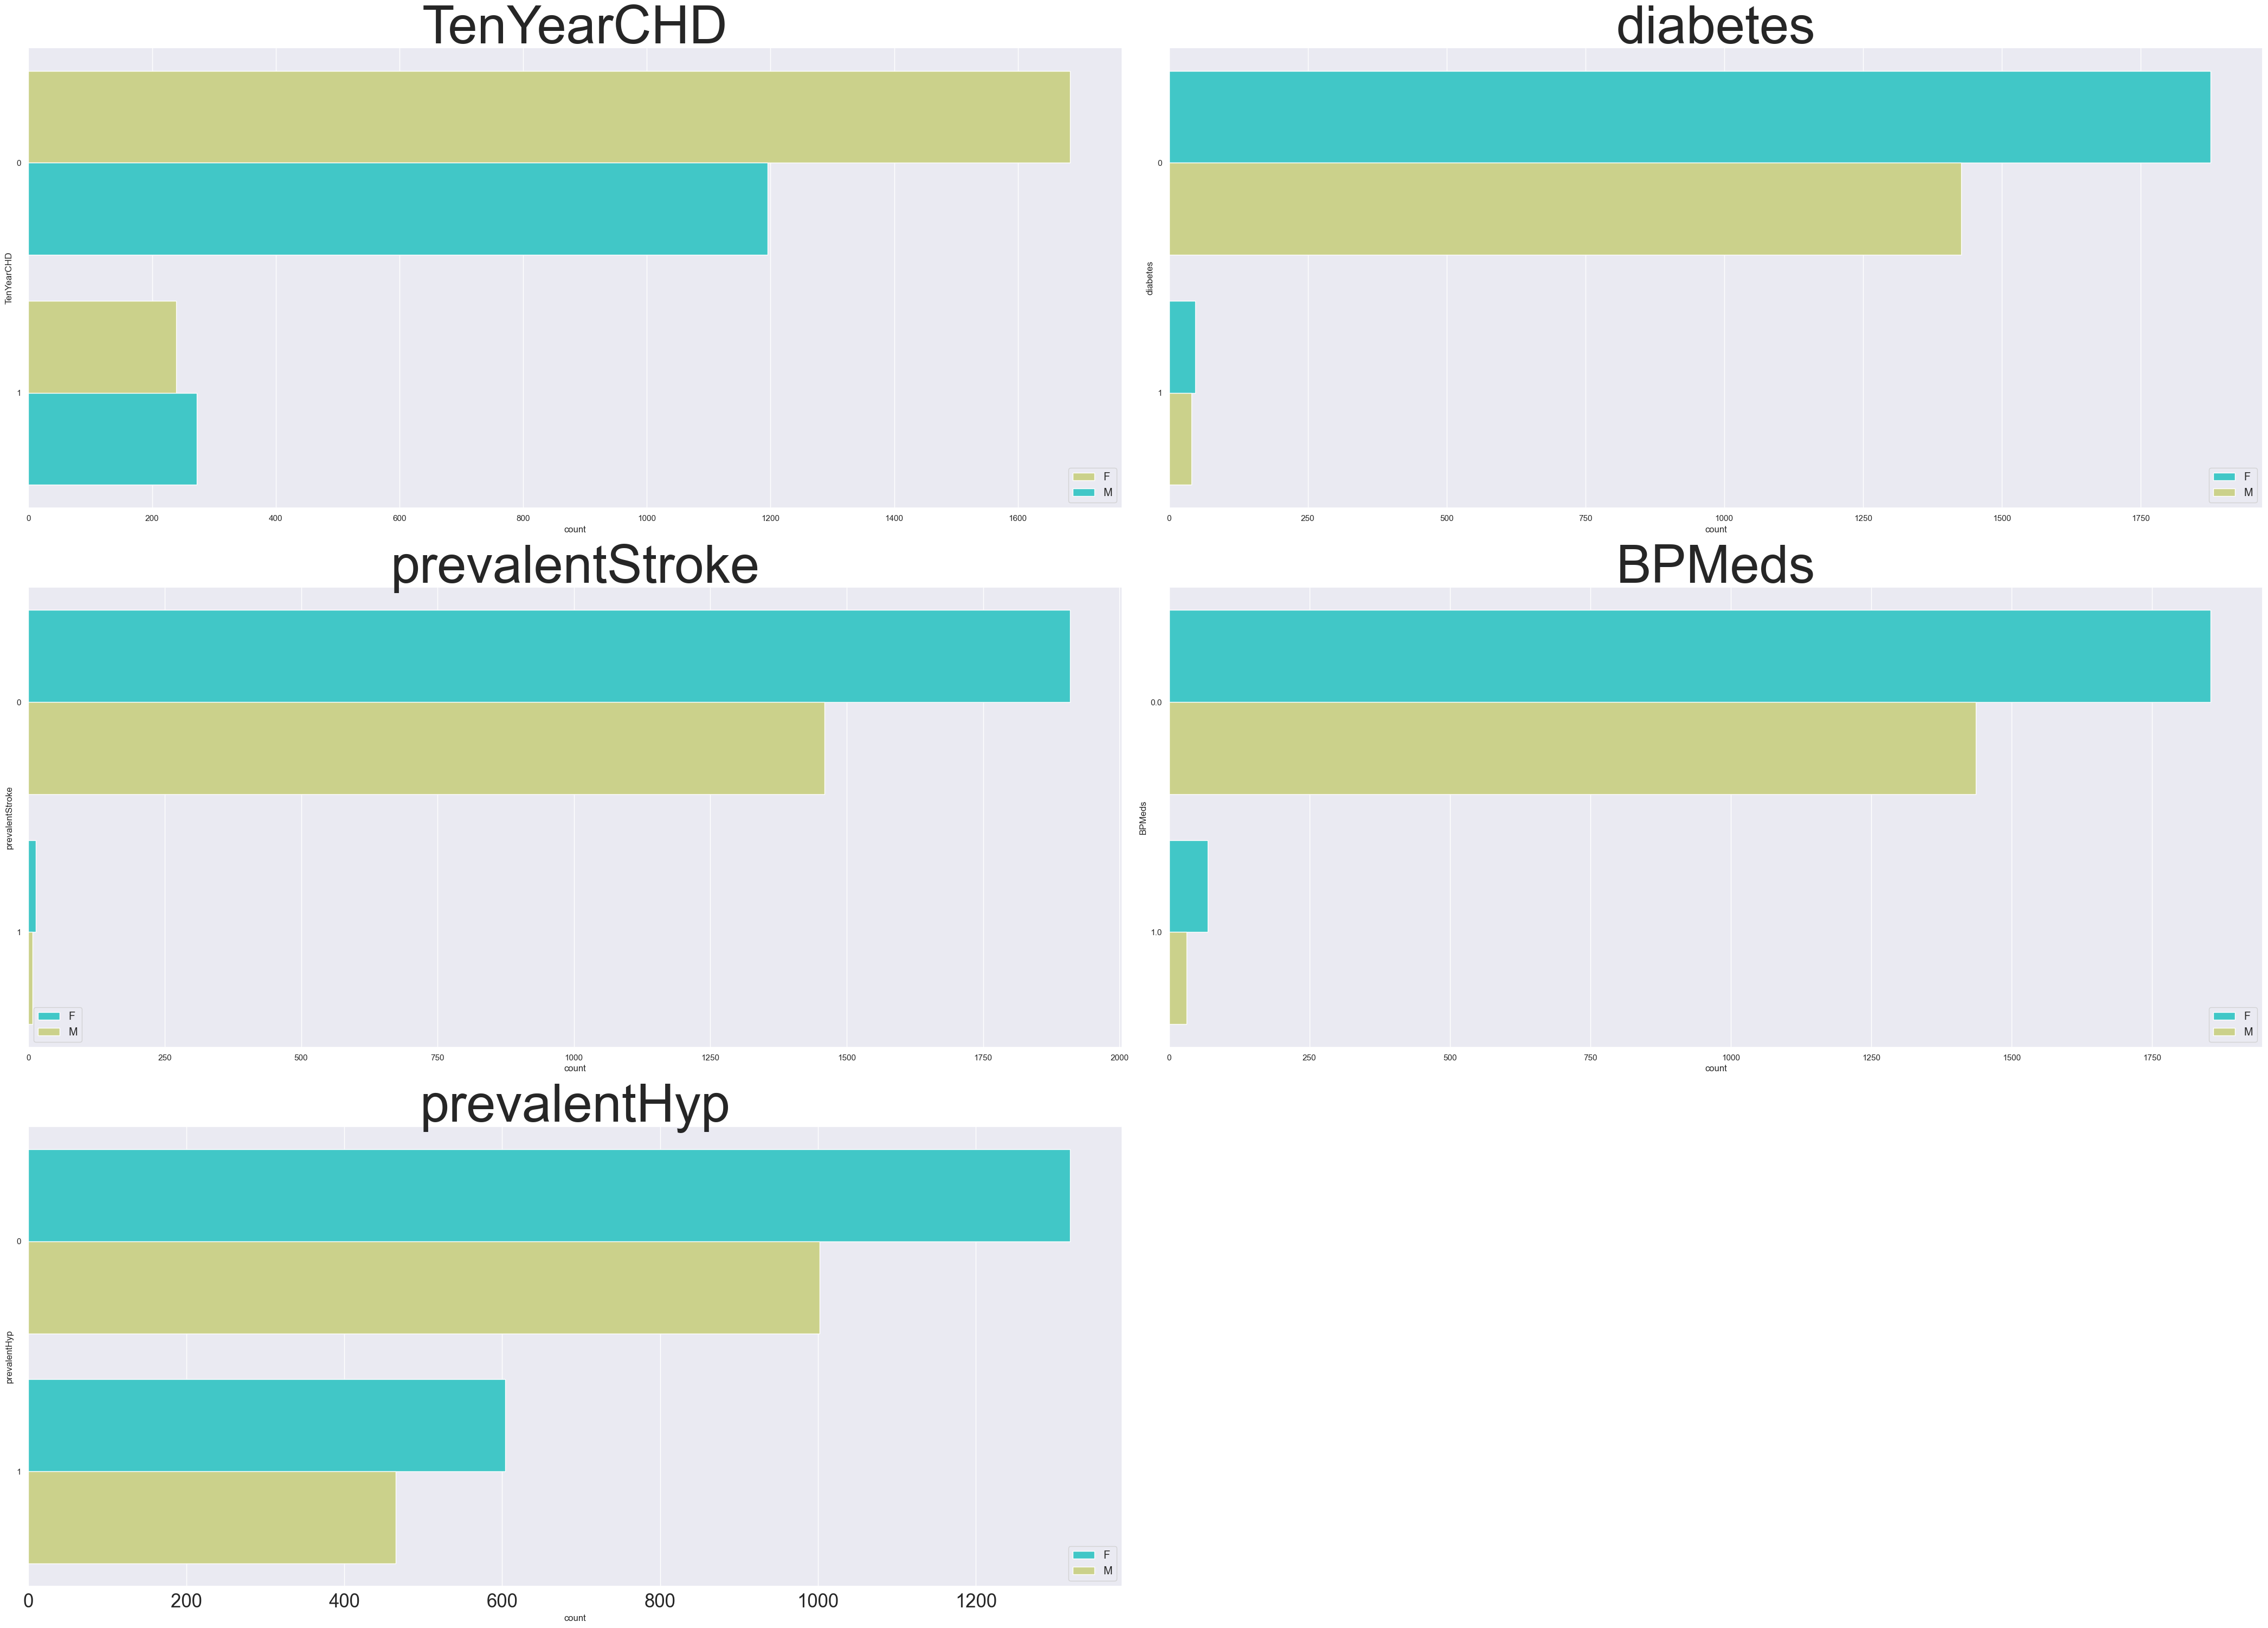

In [36]:
fig = plt.figure(figsize=(42,30))


#  subplot #1
plt.subplot(3,2,1)
plt.title('TenYearCHD', fontsize=70,)
ax=sns.countplot(data = df, y = 'TenYearCHD', hue= "sex", palette='rainbow_r', orient="h")
ax.legend(fontsize='large')

#  subplot #2
plt.subplot(3,2,2)
plt.title('diabetes', fontsize=70)
bx=sns.countplot(data = df, y = 'diabetes', hue= 'sex', palette='rainbow', orient="h")
bx.legend(fontsize='large')

#  subplot #3
plt.subplot(3,2,3)
plt.title('prevalentStroke', fontsize=70)
cx=sns.countplot(data = df, y = 'prevalentStroke', hue = 'sex', palette='rainbow', orient="h")
cx.legend(fontsize='large')

#  subplot #4
plt.subplot(3,2,4)
plt.title('BPMeds', fontsize=70)
dx=sns.countplot(data = df, y = 'BPMeds', hue = 'sex', palette='rainbow', orient="h")
dx.legend(fontsize='large')

#  subplot #5
plt.subplot(3,2,5)
plt.title('prevalentHyp', fontsize=70)
ex=sns.countplot(data = df, y = 'prevalentHyp', hue = 'sex', palette='rainbow', orient="h")
ex.legend(fontsize='large')



# Adjust plot spacing
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.xticks(fontsize=25)
plt.show()

From above countplot we can observe:

* We can see Gender-wise countplot data for all the categorical columns.
* We can get Idea various categorical sub-values and their frequency with reference to Gender of patients.
* Risk rate is greater in Male than Female patients.

## "Education wise CigsPerDay Counts"

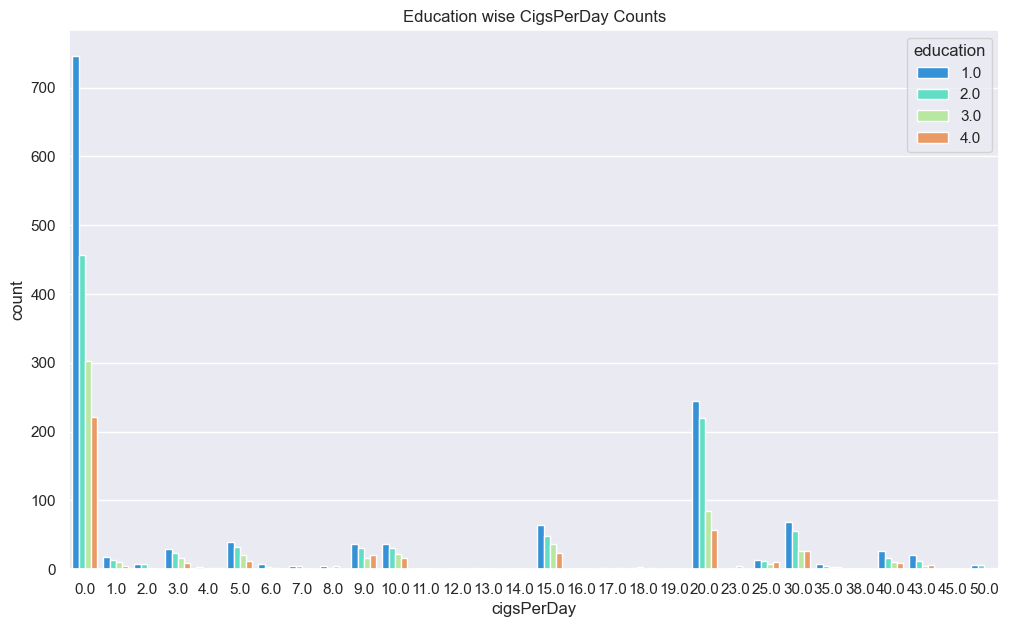

In [37]:
plt.figure(figsize=[12,7])
plt.title("Education wise CigsPerDay Counts")
sns.countplot(data = df,x='cigsPerDay',  hue= 'education', palette='rainbow', orient="h")
plt.show()

From above plot a few observation can be made:
   - Most no. of people are in non-smoking category.
   - some of the people who are pursuing Higher Secondary are leading the chart, it means they have habit of smoking and their cigsPerDay counts are also high. It may be due to pressure of studies or due to impact of bad influence.
   - followed by people pursuing graduation , Post- Graduation and PHD ,It also may be due to pressure of careers or may be personal issues or previous habit of smoking.

## How Education is affecting risk of CHD

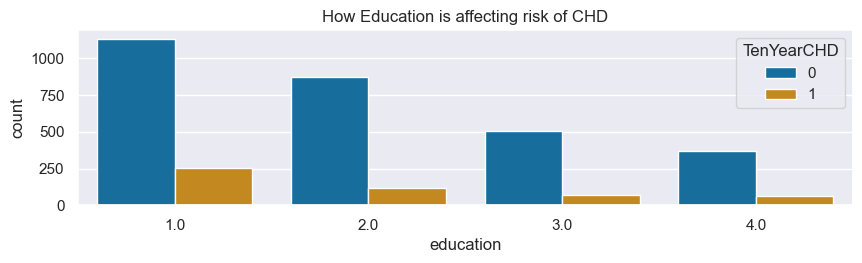

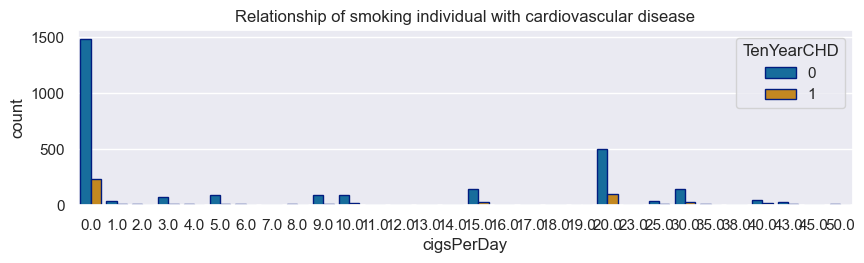

In [38]:
plt.figure(figsize=[10,5])


plt.subplot(2,1,1)
plt.title("How Education is affecting risk of CHD")
sns.countplot(data = df,x='education',  hue= 'TenYearCHD', palette='colorblind', orient="h")
plt.show()

plt.figure(figsize=[10,5])
plt.subplot(2,1,2)
plt.title("Relationship of smoking individual with cardiovascular disease")
sns.countplot(x='cigsPerDay', hue='TenYearCHD', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))
plt.show()


From above plot few key learnings:
- Education is the key to success but sometime it may can influence bad behaviour.
- Here according to data we can observe that ,individuals who are highly educated may still choose to smoke.
- It may be due to factors such as **peer pressure, stress, or lack of awareness about the health risk associated with smoking.**
- This behaviour may lead do risk of CHD in future.

## How Age is impacting risk of CHD

<Axes: title={'center': 'Number of people with cardiovascular disease exceed the number of people without cardiovascular disease'}, xlabel='age', ylabel='count'>

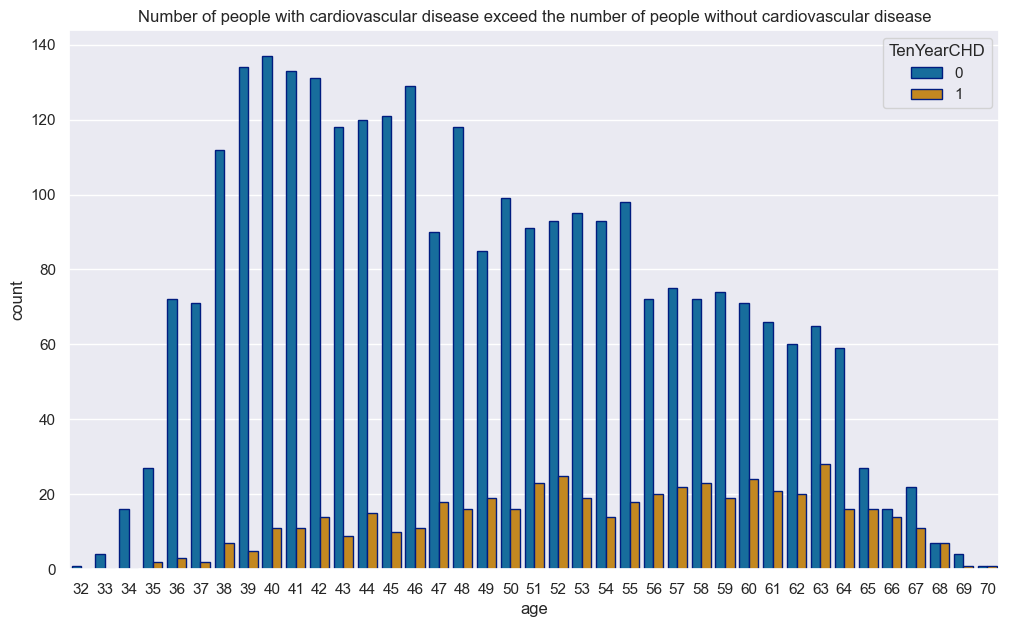

In [39]:
plt.figure(figsize=[12,7])
plt.title("Number of people with cardiovascular disease exceed the number of people without cardiovascular disease")
sns.countplot(x='age', hue='TenYearCHD', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

*  As we can see in above plot The people with the highest risk of developing heart disease are between the ages of 51 and 63.
* Because human body becames weaker generally with increasing age.
* Age is significant risk factor for **Coronory Heart Disease**.
* The arteries become narrower and less flexible with age,making them more susceptible to plaque buildup,which can lead to CHD.

# Encoding

In [40]:
df['sex']=df['sex'].astype('category')
df['sex']=df['sex'].cat.codes

df['is_smoking']=df['is_smoking'].astype('category')
df['is_smoking']=df['is_smoking'].cat.codes

## Feature Selection by Correlation 

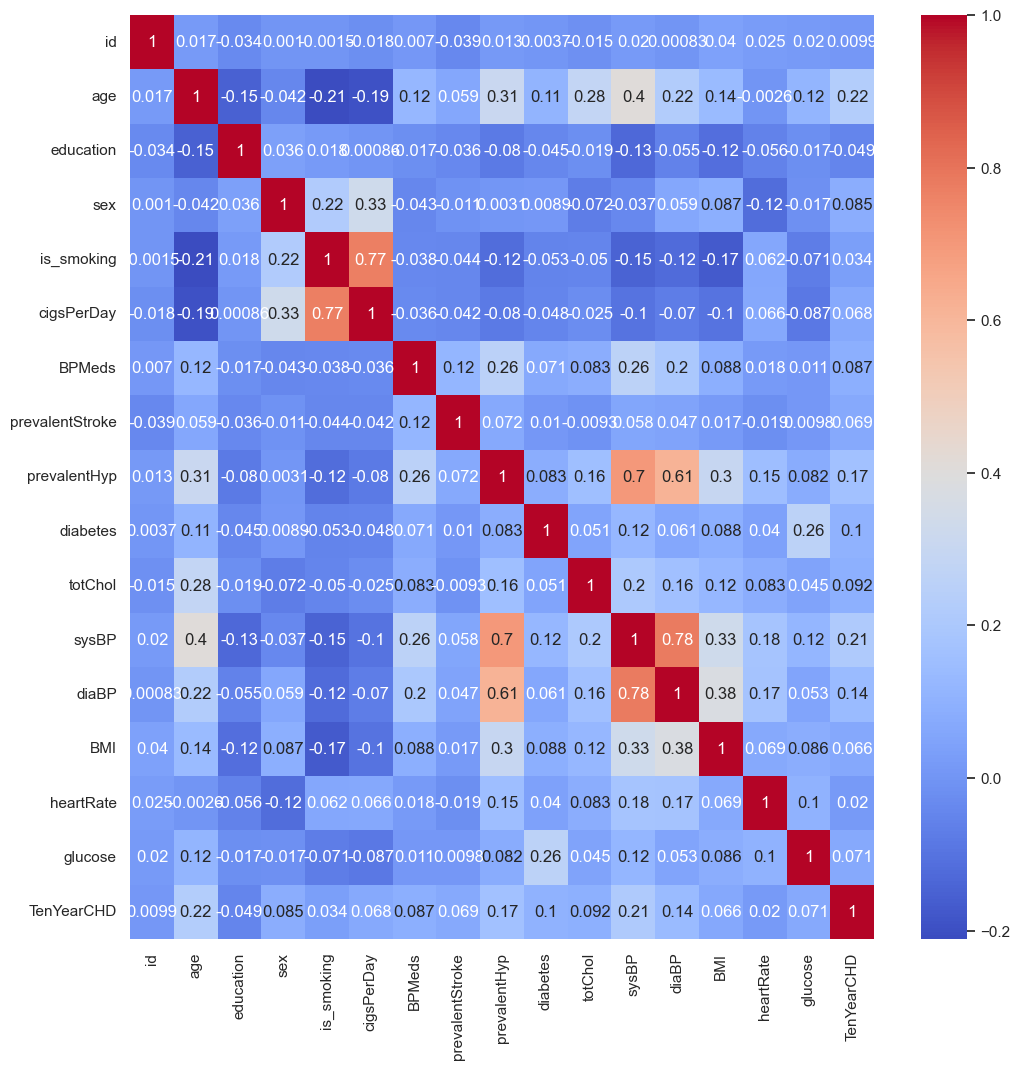

In [41]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2g')
plt.show()

Few **key Learnings** from the correlation vizualisation heatmap above:

- 'cigsPerDay' has a **77%(Strong positive)** correlation with 'is_smoking', both the columns are giving same information so we can drop one.
- 'diaBP' has **78%(Strong positive)** correlation with 'sysBP', however both parameters are crucial for assessing cardiovascular risk but 'sysBp' is often considered more critical ,especially in older adults,as it is strong predictor of cardiovascular  events like **Heart attack & strokes**.
- So we can drop diaBP to avoid multicolinearity issue.

In [42]:
df.drop(columns=['id','diaBP','is_smoking'],axis=1,inplace=True)

In [43]:
df.head()

age  education  sex  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP    BMI  heartRate  glucose  TenYearCHD
0   64        2.0    0         3.0     0.0                0             0         0    221.0  148.0  25.38       90.0     80.0           1
1   36        4.0    1         0.0     0.0                0             1         0    212.0  168.0  29.77       72.0     75.0           0
2   46        1.0    0        10.0     0.0                0             0         0    250.0  116.0  20.35       88.0     94.0           0
3   50        1.0    1        20.0     0.0                0             1         0    233.0  158.0  28.26       68.0     94.0           1
4   64        1.0    0        30.0     0.0                0             0         0    241.0  136.5  26.42       70.0     77.0           0

## Extracting Features & Target

In [44]:
x=df.iloc[:,:-1]
y=df['TenYearCHD']

### Checking For imbalance Class for Target Variable

In [45]:
y.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

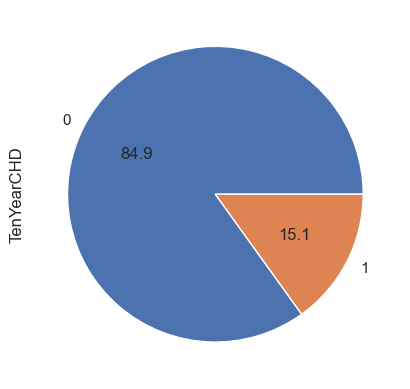

In [46]:
y.value_counts().plot(kind='pie',autopct='%.1f')
plt.show()

* As we can see the classes are highly uneven , data is imbalanced.
* An imbalanced dataset often lead to biased prediction.
* Therefore, handling imbalanced data is crucial for fair model performance.

### Balancing Data Through SMOTE

In [47]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x,y)

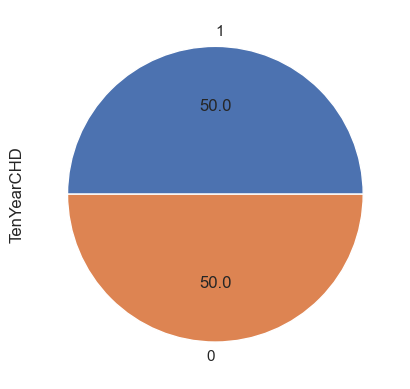

In [48]:
y_smote.value_counts().plot(kind='pie',autopct='%.1f')
plt.show()

## Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x_smote)

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sc,y_smote,test_size=0.25,random_state=42)

# Model Building & Evaluation

### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf1= RandomForestClassifier()
rf1.fit(x_train,y_train)
y_pred_train1=rf1.predict(x_train)
y_pred_test1=rf1.predict(x_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score  #evaluation Matrix

In [53]:
confusion_matrix(y_test,y_pred_test1)

array([[676,  57],
       [ 74, 633]], dtype=int64)

In [54]:
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       733
           1       0.92      0.90      0.91       707

    accuracy                           0.91      1440
   macro avg       0.91      0.91      0.91      1440
weighted avg       0.91      0.91      0.91      1440



In [55]:
print('Training Accuracy',accuracy_score(y_train,y_pred_train1))
print('***************************')
print('Testing Accuracy',accuracy_score(y_test,y_pred_test1))

Training Accuracy 1.0
***************************
Testing Accuracy 0.9090277777777778


### Lets see the important features according to Random Forest

In [56]:
rf1.feature_importances_

array([0.13565015, 0.17065671, 0.01802876, 0.07774175, 0.01941337,
       0.00119434, 0.01281312, 0.00365969, 0.11835085, 0.13483477,
       0.09850094, 0.10750666, 0.10164888])

In [57]:
imp=pd.DataFrame(index=x.columns,data=rf1.feature_importances_,columns=['Feature Importance'])
imp=imp.sort_values('Feature Importance',ascending=False)
imp

Feature Importance
education                  0.170657
age                        0.135650
sysBP                      0.134835
totChol                    0.118351
heartRate                  0.107507
glucose                    0.101649
BMI                        0.098501
cigsPerDay                 0.077742
BPMeds                     0.019413
sex                        0.018029
prevalentHyp               0.012813
diabetes                   0.003660
prevalentStroke            0.001194

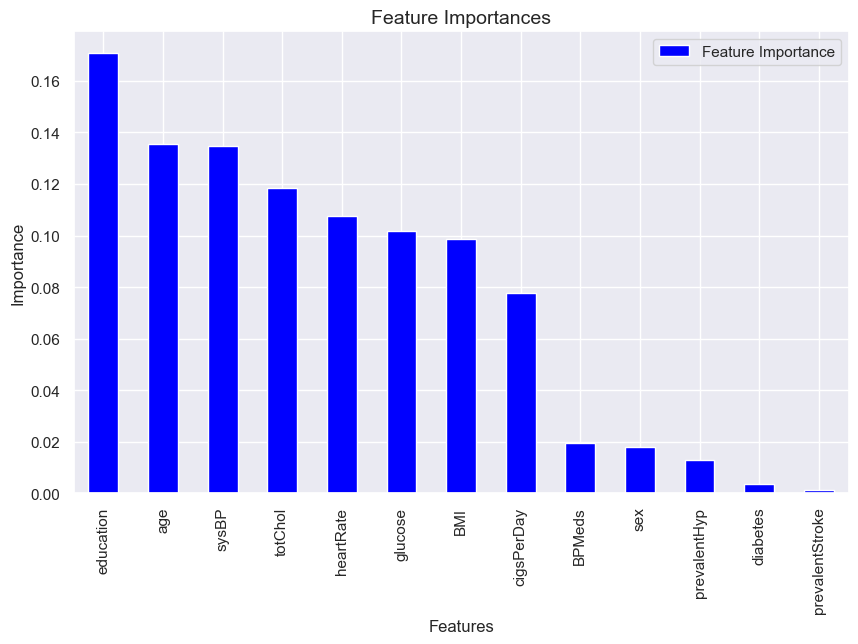

In [58]:
imp.plot(kind='bar',color='blue',figsize=(10,6))
plt.title('Feature Importances', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.show()

Top 10 features for CHD given by Random Forest Model:

- Education
- Age
- SysBP
- totChol
- HeartRate
- BMI
- glucose
- cigsPerDay
- BPMeds
- Sex

### Random Forest- Post Prunning

In [59]:
rf2= RandomForestClassifier(max_depth=8,n_estimators=1000)
rf2.fit(x_train,y_train)
y_pred_train2=rf2.predict(x_train)
y_pred_test2=rf2.predict(x_test)

In [60]:
confusion_matrix(y_test,y_pred_test2)

array([[611, 122],
       [126, 581]], dtype=int64)

In [61]:
print(classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       733
           1       0.83      0.82      0.82       707

    accuracy                           0.83      1440
   macro avg       0.83      0.83      0.83      1440
weighted avg       0.83      0.83      0.83      1440



In [62]:
print('Training Accuracy',accuracy_score(y_train,y_pred_train2))
print('***************************')
print('Testing Accuracy',accuracy_score(y_test,y_pred_test2))

Training Accuracy 0.8971746178786475
***************************
Testing Accuracy 0.8277777777777777


### KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
error_rate=[]

for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))

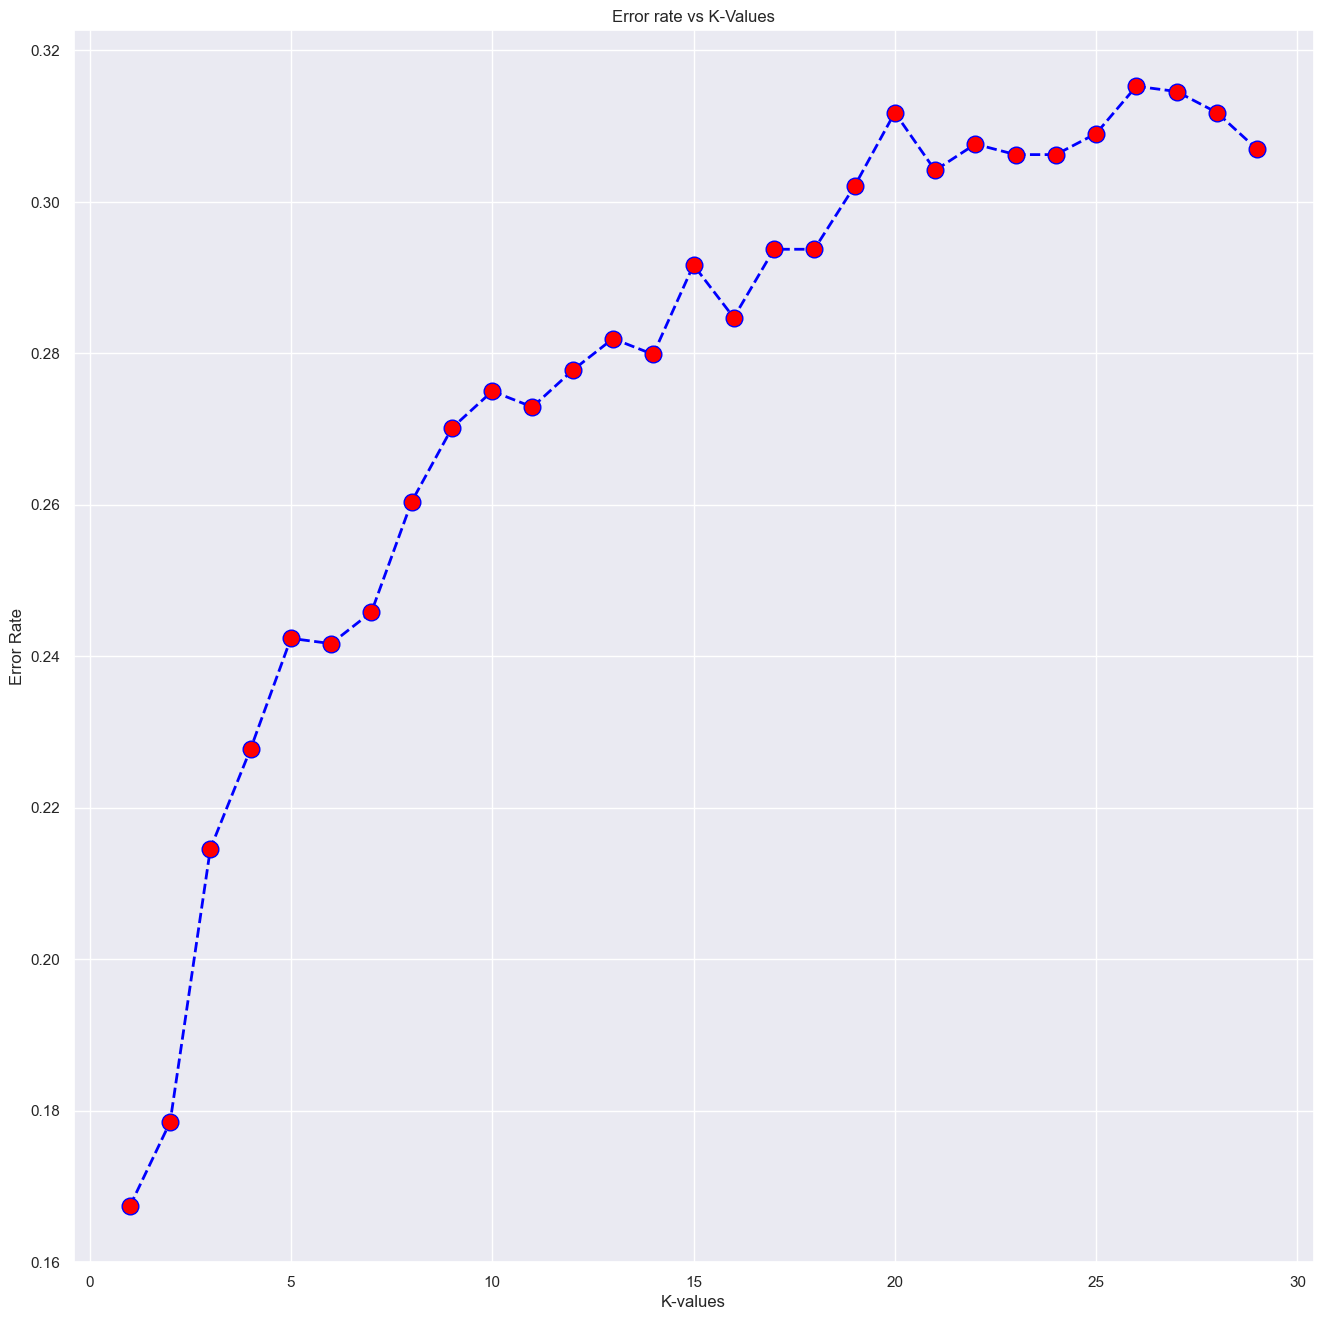

In [65]:
plt.figure(figsize=(16,16))
plt.plot(range(1,30),error_rate,color='blue',linestyle='dashed',linewidth=2,markersize=12,marker='o',markerfacecolor='red')
plt.title('Error rate vs K-Values')
plt.xlabel('K-values')
plt.ylabel('Error Rate')
plt.show()

In [66]:
knn1=KNeighborsClassifier(n_neighbors=3)
knn1.fit(x_train,y_train)
y_pred_knn_train1=knn1.predict(x_train)
y_pred_knn_test1=knn1.predict(x_test)

In [67]:
confusion_matrix(y_test,y_pred_knn_test1)

array([[495, 238],
       [ 71, 636]], dtype=int64)

In [68]:
print(classification_report(y_test,y_pred_knn_test1))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76       733
           1       0.73      0.90      0.80       707

    accuracy                           0.79      1440
   macro avg       0.80      0.79      0.78      1440
weighted avg       0.80      0.79      0.78      1440



In [69]:
print('Training Accuracy',accuracy_score(y_train,y_pred_knn_train1))
print('***************************')
print('Testing Accuracy',accuracy_score(y_test,y_pred_knn_test1))

Training Accuracy 0.8950903195924039
***************************
Testing Accuracy 0.7854166666666667


### XGBooster

In [70]:
from xgboost import XGBClassifier

In [71]:
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred_train_xg=xg.predict(x_train)
y_pred_test_xg=xg.predict(x_test)

In [72]:
confusion_matrix(y_test,y_pred_test_xg)

array([[674,  59],
       [106, 601]], dtype=int64)

In [73]:
print(classification_report(y_test, y_pred_test_xg))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       733
           1       0.91      0.85      0.88       707

    accuracy                           0.89      1440
   macro avg       0.89      0.88      0.89      1440
weighted avg       0.89      0.89      0.89      1440



In [74]:
print("Train Accuracy" , accuracy_score(y_train, y_pred_train_xg))
print("***************"*5)
print("Test Accuracy" , accuracy_score(y_test, y_pred_test_xg))

Train Accuracy 0.9965261695229273
***************************************************************************
Test Accuracy 0.8854166666666666


### Bagging Classifier

In [75]:
from sklearn.ensemble import BaggingClassifier

In [76]:
bag = BaggingClassifier(n_estimators=100)
bag.fit(x_train, y_train)
y_pred_bag_train = bag.predict(x_train)
y_pred_bag_test = bag.predict(x_test)

In [77]:
confusion_matrix(y_test, y_pred_bag_test)

array([[674,  59],
       [ 94, 613]], dtype=int64)

In [78]:
print(classification_report(y_test, y_pred_bag_test))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       733
           1       0.91      0.87      0.89       707

    accuracy                           0.89      1440
   macro avg       0.89      0.89      0.89      1440
weighted avg       0.89      0.89      0.89      1440



In [79]:
print("Train Accuracy", accuracy_score(y_train, y_pred_bag_train))
print("*********************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_bag_test))

Train Accuracy 1.0
*********************************************************************************************************
Test Accuracy 0.89375


### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred_train_lr = logit_model.predict(x_train)
y_pred_test_lr = logit_model.predict(x_test)

In [81]:
confusion_matrix(y_test, y_pred_test_lr)

array([[478, 255],
       [244, 463]], dtype=int64)

In [82]:
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66       733
           1       0.64      0.65      0.65       707

    accuracy                           0.65      1440
   macro avg       0.65      0.65      0.65      1440
weighted avg       0.65      0.65      0.65      1440



In [83]:
print("Train Accuracy", accuracy_score(y_train, y_pred_train_lr))
print("*********************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_test_lr))

Train Accuracy 0.6637332098193608
*********************************************************************************************************
Test Accuracy 0.6534722222222222


### Gradient Boosting

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
gbcls = GradientBoostingClassifier()
gbcls.fit(x_train, y_train)
y_pred_gdb_train = gbcls.predict(x_train)
y_pred_gdb_test = gbcls.predict(x_test)

In [85]:
confusion_matrix(y_test, y_pred_gdb_test)

array([[671,  62],
       [171, 536]], dtype=int64)

In [86]:
print(classification_report(y_test, y_pred_gdb_test))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       733
           1       0.90      0.76      0.82       707

    accuracy                           0.84      1440
   macro avg       0.85      0.84      0.84      1440
weighted avg       0.85      0.84      0.84      1440



In [87]:
print("Train Accuracy", accuracy_score(y_train, y_pred_gdb_train))
print("*********************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_gdb_test))


Train Accuracy 0.8640574339972209
*********************************************************************************************************
Test Accuracy 0.8381944444444445


## Receiver Operating Characteristics curve and Area Under the Curve (ROC-AUC)

In [88]:
from sklearn.metrics import roc_curve, auc

#### Roc-Random Forest

In [89]:
y_pred_rfc = rf2.predict_proba(x_test)[:,1]
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

#### Roc-Logistic

In [90]:
y_pred_logistic = logit_model.predict_proba(x_test)[:,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

#### Roc-KNN

In [91]:
y_pred_knn = knn1.predict_proba(x_test)[:,1]
knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

#### Roc-XGBooster

In [92]:
y_pred_xgb = xg.predict_proba(x_test)[:,1]
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

#### Roc-GBoosting

In [93]:
y_pred_gb = gbcls.predict_proba(x_test)[:,1]
gb_fpr, gb_tpr, threshold = roc_curve(y_test, y_pred_gb)
auc_gb = auc(gb_fpr, gb_tpr)

#### Roc- Bagging

In [94]:
y_pred_bag = bag.predict_proba(x_test)[:,1]
bag_fpr, bag_tpr, threshold = roc_curve(y_test, y_pred_bag)
auc_bag = auc(bag_fpr, bag_tpr)

### Plot:ROC-AUC

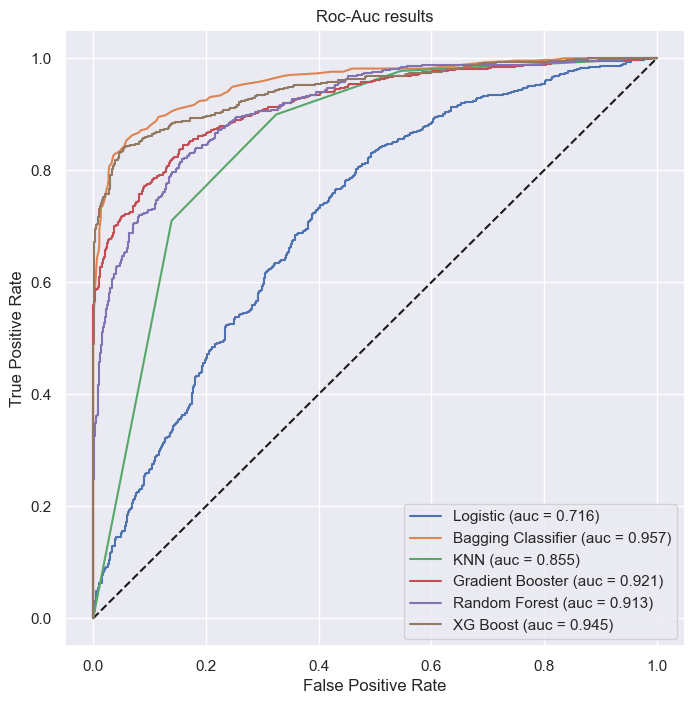

In [95]:
plt.figure(figsize=(8, 8), dpi=100)
plt.plot([0, 1], [0, 1], 'k--')
# Logistic Regression
plt.plot(logistic_fpr, logistic_tpr, label='Logistic (auc = %0.3f)' % auc_logistic)
# Bagging
plt.plot(bag_fpr, bag_tpr, label='Bagging Classifier (auc = %0.3f)' % auc_bag)
# KNN
plt.plot(knn_fpr, knn_tpr, label='KNN (auc = %0.3f)' % auc_knn)
# Gradient Boosting
plt.plot(gb_fpr, gb_tpr, label='Gradient Booster (auc = %0.3f)' % auc_gb)
# Random Forest
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (auc = %0.3f)' % auc_rfc)
# XGBoost
plt.plot(xgb_fpr, xgb_tpr, label='XG Boost (auc = %0.3f)' % auc_xgb)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc-Auc results')
plt.legend(loc='best')
plt.show();

* The higher the AUC, the better the model’s performance at distinguishing between the positive and negative classes.
* A greater value of AUC denotes better model performance. 
* All the models having AUC aboove 0.7 ,indicates that all models are performing well.

## Conclusion:

### In this analysis, some important results were found as follows:

* The topic uses Machine Learning models to come up with the best model for predicting CHD risks.
* most of the models giving high variance indicating a overfitted model.
* The best model given is the Logistic Gradient Boosting & Random forest-Post pruning as theses models are not giving high-bias or high variances and also have better F1 Score.
* The accuracy of the Random forest model is 81.94%. ROC is very high (auc = 90.8%).
* The accuracy of the Gradient oosting model is 83.81%. ROC is very high (auc = 94.6%).
* It indicating that both the model have good predictive power.
* Note :for more better results we can have more data. 

##  Key Findings & Suggestion:

* Factors such as **cigsPerDay, sysBP, diaBP and Age were found to be important predictors of heart disease.**
* Additionally, lifestyle factors accumulated over time,such as **poor diet, lack of excersise, and smoking,** can further increase the risk of CHD .
* The health care faculty can use the model to identify patients who are at high risk of having heart disease and take proactive measures to reduce them.

 **Suggestion:**

  Lowering the risk of heart disease involves adopting a healthy lifestyle and managing risk factors. Here are some key strategies:
 * Healthy Diet
 * Regular Exercise
 * Maintain a Healthy Weight
 * Quit Smoking
 * Limit Alcohol
 * Manage Stress
 * Monitor Blood Pressure
 * Control Cholesterol Levels
 * Manage Diabetes
 * Get Regular Check-ups
 
 By adopting these lifestyle changes and working with your healthcare provider to manage risk factors, you can significantly lower your risk of heart disease and promote overall heart health.

# Thank You....